In [8]:
from sklearn import datasets
from sklearn.datasets import load_iris 
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score

In [9]:
# 从sklearn的数据集中获取iris数据
iris =load_iris()
 # 洗乱数据
indices = np.arange(len(iris.data))
np.random.shuffle(indices)
 
# 查看数据的形状
print(iris.data.shape)
print(iris.target.shape)
print(type(iris))
print(type(iris.data))
# 分割训练数据集和测试数据集
split_index = int(len(iris.data) * 0.2)
 
data = iris.data[indices]
target = iris.target[indices]
 
tr_value = data[:-split_index]
tr_target = target[:-split_index]
 
te_value = data[-split_index:]
te_target = target[-split_index:]


(150, 4)
(150,)
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>


In [10]:
def knn(tr_value, tr_target, te_value, te_target, k):
    hit = 0
    for i in range(len(te_value)):
        # 利用numpy提供的大矩阵运算简洁地计算当前数据与所有测试数据之间的欧氏距离
        one2n = np.tile(te_value[i], (int(len(tr_value)), 1))
        distance = (((tr_value - one2n) ** 2).sum(axis=1)) ** 0.5
 
        count = {}
        # 根据距离从小到大排列训练数据的下标
        sorted_distance = distance.argsort()
        # 统计前k个训练数据中哪个标签出现次数最多
        # print(sorted_distance)
        for j in range(k):
            # print(distance[sorted_distance[j]])
            tmp_tag = tr_target[sorted_distance[j]]
            # print(tmp_tag)
            if tmp_tag in count.keys():
                count[tmp_tag] += 1
            else:
                count[tmp_tag] = 1
 
        # 排序后选取出现次数最多的标签作为当前测试数据的预测结果
        tag_count = sorted(count.items(), key=lambda x: x[1], reverse=True)
        print(te_target[i], tag_count[0][0])
        if te_target[i] == tag_count[0][0]:
            hit += 1

    accuracy = hit / len(te_target)
    print('accuracy:%f\n' % accuracy)


In [11]:
knn(tr_value, tr_target, te_value, te_target, 8)

0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
2 2
1 1
2 2
1 1
2 2
1 1
1 1
2 2
2 2
1 1
2 2
0 0
0 0
1 1
2 2
1 1
1 1
1 1
0 0
accuracy:1.000000



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
[0.9412463768115942, 0.9495797101449275, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145, 0.9408840579710145]


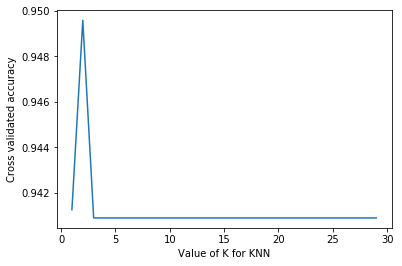

In [12]:
k_range = range(1,30)
k_scores = []
for k in k_range:
    print(k)
    clf = XGBClassifier(learning_rate= 0.28, min_child_weight=0.7, max_depth=21,
                        gamma=0.2, n_estimators = k ,seed=1000)

    X_Train = tr_value
    Y_Train = tr_target

    X, y = (X_Train, Y_Train)
    
    #交叉验证，循环跑，cv是每次循的次数
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    #得到平均值
    k_scores.append(scores.mean())

print(k_scores)
#画出图像
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross validated accuracy")
plt.show()